## CHICAGO CRIME DATA ANALYSIS

In [1]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark import SparkFiles
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import TimestampType

### Creating a Spark Context

In [2]:
sc = SparkContext.getOrCreate()

### Extracting data from the URL and storing it as a data frame

In [3]:
data_url = "https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD"

In [4]:
sc.addFile(data_url)
schemacontext = SQLContext(sc)

D:\DATA_603\Spark\python\pyspark\sql\context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [5]:
data = schemacontext.read.csv(SparkFiles.get("rows.csv"), header = True, inferSchema = True)

In [6]:
data = data.cache() #For faster access to data

### Data Pre-processing

In [7]:
data.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [8]:
data.show(5, truncate = False)

+--------+-----------+----------------------+--------------------+----+------------------+---------------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+--------+---------+--------+
|ID      |Case Number|Date                  |Block               |IUCR|Primary Type      |Description                            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude|Longitude|Location|
+--------+-----------+----------------------+--------------------+----+------------------+---------------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+--------+---------+--------+
|11037294|JA371270   |03/18/2015 12:00:00 PM|0000X W WACKER DR   |1153|DECEPTIVE PRACTICE|FINANCIAL IDENTITY THEFT OVER $

In [9]:
data.describe().show()

+-------+-----------------+------------------+--------------------+--------------+------------------+-----------------+---------------+--------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+--------------------+-------------------+--------------------+--------------------+
|summary|               ID|       Case Number|                Date|         Block|              IUCR|     Primary Type|    Description|Location Description|              Beat|          District|              Ward|    Community Area|         FBI Code|      X Coordinate|      Y Coordinate|              Year|          Updated On|           Latitude|           Longitude|            Location|
+-------+-----------------+------------------+--------------------+--------------+------------------+-----------------+---------------+--------------------+------------------+------------------+------------------+-----

In [10]:
print(data.count())

7918014


There are more than 7 million entries in the dataframe.

In [11]:
'''
Removing all NULL values from the data frame.
We remove the entire row if any of the cell is a NULL value
'''
new_data = data.na.drop()
new_data.show()

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|12045583|   JD226426|05/07/2020 10:24:...| 035XX S INDIANA AVE|0820|               THEFT|      $500 AND UNDER|           AP

In [12]:
'''
Changing the Format of the 'Date' column. 
Initially, the 'Date' column has a string data type. See data.printSchema()
The updated data frame 'new_data' will have the 'date' column in the 'timestamp' format
'''

new_data = new_data.withColumn("Date", to_timestamp(col("Date"),"MM/dd/yyyy hh:mm:ss a").cast('timestamp'))


In [13]:
new_data.select('Date').show()

+-------------------+
|               Date|
+-------------------+
|2020-05-07 10:24:00|
|2020-04-16 05:00:00|
|2020-07-01 10:16:00|
|2020-09-27 23:29:00|
|2005-07-10 15:00:00|
|2020-08-04 20:28:00|
|2020-03-15 21:00:00|
|2020-06-02 22:00:00|
|2005-08-12 23:00:00|
|2020-09-11 22:44:00|
|2020-08-21 00:00:00|
|2020-03-11 00:00:00|
|2020-06-01 01:20:00|
|2020-05-23 12:20:00|
|2020-05-22 22:29:00|
|2020-07-15 22:15:00|
|2020-09-28 10:23:00|
|2020-09-09 09:23:00|
|2020-06-06 07:45:00|
|2020-08-05 01:00:00|
+-------------------+
only showing top 20 rows



In [14]:
new_data.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



#### Filter the data

In [15]:
'''
The data frame is filtered down to the crimes from 2013 to the present.
'''
new_data = new_data.filter(new_data['Date'] >= "2013-10-21 00:00:00")
new_data.show()

+--------+-----------+-------------------+--------------------+----+-----------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|     Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+-----------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|12045583|   JD226426|2020-05-07 10:24:00| 035XX S INDIANA AVE|0820|            THEFT|      $500 AND UNDER|           APARTMENT| false| 

In [16]:
new_data.describe().show()

+-------+--------------------+-----------+------------------+------------------+-----------------+--------------------+--------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+--------------------+--------------------+
|summary|                  ID|Case Number|             Block|              IUCR|     Primary Type|         Description|Location Description|             Beat|          District|              Ward|    Community Area|          FBI Code|      X Coordinate|      Y Coordinate|              Year|          Updated On|           Latitude|           Longitude|            Location|
+-------+--------------------+-----------+------------------+------------------+-----------------+--------------------+--------------------+-----------------+------------------+------------------+------------------+------------------+----------------

##### As we filtered the data frame to the cases from 2013, the number of records have become around 2 million

In [17]:
'''
All the records with the crime types - 
- 'NON-CRIMINAL (SUBJECT SPECIFIED)'
- 'OTHER OFFENSE'
- 'STALKING'
- 'NON - CRIMINAL'
- 'ARSON'
are removed from the dataset
The column that describes the crime type is 'Primary Type'.
'''
non_crimes = ['NON-CRIMINAL (SUBJECT SPECIFIED)','OTHER OFFENSE','STALKING','NON - CRIMINAL','NON-CRIMINAL','ARSON']
new_data = new_data.filter(col("Primary Type").isin(non_crimes) == False)
new_data.show()

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|12045583|   JD226426|2020-05-07 10:24:00| 035XX S INDIANA AVE|0820|              THEFT|      $500 AND UNDER|           APARTMENT|

In [18]:
new_data = new_data.cache()

#### Merging Similar Crimes

In [19]:
'''
For example, change 'Primary Type' of cases that have 'Primary Type' as ‘SEX OFFENSE’ or 
‘PROSTITUTION’ such that they should have the same 'Primary Type'.
First, the distinct crime types are extracted from the data frame
'''
new_data.select('Primary Type').distinct().collect()

[Row(Primary Type='OFFENSE INVOLVING CHILDREN'),
 Row(Primary Type='CRIMINAL SEXUAL ASSAULT'),
 Row(Primary Type='PUBLIC PEACE VIOLATION'),
 Row(Primary Type='OBSCENITY'),
 Row(Primary Type='GAMBLING'),
 Row(Primary Type='CRIMINAL TRESPASS'),
 Row(Primary Type='ASSAULT'),
 Row(Primary Type='LIQUOR LAW VIOLATION'),
 Row(Primary Type='MOTOR VEHICLE THEFT'),
 Row(Primary Type='THEFT'),
 Row(Primary Type='BATTERY'),
 Row(Primary Type='ROBBERY'),
 Row(Primary Type='HOMICIDE'),
 Row(Primary Type='RITUALISM'),
 Row(Primary Type='PUBLIC INDECENCY'),
 Row(Primary Type='CRIM SEXUAL ASSAULT'),
 Row(Primary Type='HUMAN TRAFFICKING'),
 Row(Primary Type='INTIMIDATION'),
 Row(Primary Type='PROSTITUTION'),
 Row(Primary Type='DECEPTIVE PRACTICE'),
 Row(Primary Type='CONCEALED CARRY LICENSE VIOLATION'),
 Row(Primary Type='SEX OFFENSE'),
 Row(Primary Type='CRIMINAL DAMAGE'),
 Row(Primary Type='NARCOTICS'),
 Row(Primary Type='KIDNAPPING'),
 Row(Primary Type='BURGLARY'),
 Row(Primary Type='WEAPONS VIOLATIO

In [20]:
'''
The primary crime types are categorized into eight groups. The two already existing ones - 
'GAMBLING' and 'OFFENSE INVOLVING CHILDREN'.
The remaining six are as follows
'''
sex_offense = ["SEX OFFENSE", "PROSTITUTION",'CRIMINAL SEXUAL ASSAULT', 'CRIM SEXUAL ASSAULT']
public_violence = ['PUBLIC PEACE VIOLATION', 'OBSCENITY', 'CRIMINAL TRESPASS', 'RITUALISM', 'PUBLIC INDECENCY', 'INTIMIDATION', 'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'INTERFERENCE WITH PUBLIC OFFICER']
assault = ['ASSAULT', 'HOMICIDE', 'HUMAN TRAFFICKING', 'KIDNAPPING']
robbery = ['MOTOR VEHICLE THEFT', 'THEFT', 'BATTERY', 'ROBBERY', 'BURGLARY']
weapons = ['CONCEALED CARRY LICENSE VIOLATION', 'WEAPONS VIOLATION']
narcotics = ['LIQUOR LAW VIOLATION', 'NARCOTICS', 'OTHER NARCOTIC VIOLATION']

In [21]:
final_data = new_data.withColumn("Primary Type", when(new_data["Primary Type"].isin(sex_offense), "SEX_OFFENSE").
                                 when(new_data["Primary Type"].isin(public_violence), "PUBLIC_VIOLENCE").
                                 when(new_data["Primary Type"].isin(assault), "ASSAULT").
                                 when(new_data["Primary Type"].isin(robbery), "ROBBERY").
                                 when(new_data["Primary Type"].isin(weapons), "WEAPONARY").
                                 when(new_data["Primary Type"].isin(narcotics), "DRUGS & NARCOTICS").
                                 when(new_data["Primary Type"] == "OFFENSE INVOLVING CHILDREN", "OFFENSE INVOLVING CHILDREN").
                                 when(new_data["Primary Type"] == "GAMBLING", "GAMBLING"))
final_data.select('Primary Type').distinct().collect()

[Row(Primary Type='OFFENSE INVOLVING CHILDREN'),
 Row(Primary Type='DRUGS & NARCOTICS'),
 Row(Primary Type='GAMBLING'),
 Row(Primary Type='ASSAULT'),
 Row(Primary Type='ROBBERY'),
 Row(Primary Type='PUBLIC_VIOLENCE'),
 Row(Primary Type='WEAPONARY'),
 Row(Primary Type='SEX_OFFENSE')]

In [22]:
final_data = final_data.cache()

## DATA ANALYSIS

### 1) Year-Wise Trend in Crime

In [23]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [29]:
year_wise = final_data.groupby(['Year']).count()
year_wise_counts = year_wise.orderBy('Year', ascending = True)
year_wise_counts.show(truncate = False)

+----+------+
|Year|count |
+----+------+
|2013|50855 |
|2014|256108|
|2015|239877|
|2016|248541|
|2017|246524|
|2018|245342|
|2019|240846|
|2020|193863|
|2021|187548|
|2022|217403|
|2023|189785|
+----+------+



In [30]:
'''
We convert the above into a pandas dataframe for easy cisualization using matplotlib
'''
year_wise_pd = year_wise_counts.toPandas()
year_wise_pd.head(5)

,Year,count
0,2013,50855
1,2014,256108
2,2015,239877
3,2016,248541
4,2017,246524


[Text(0.5, 0, 'Year: 2013 - 2023'),
 Text(0, 0.5, 'Number of Crimes'),
 Text(0.5, 1.0, 'Year-wise Crime Trend')]

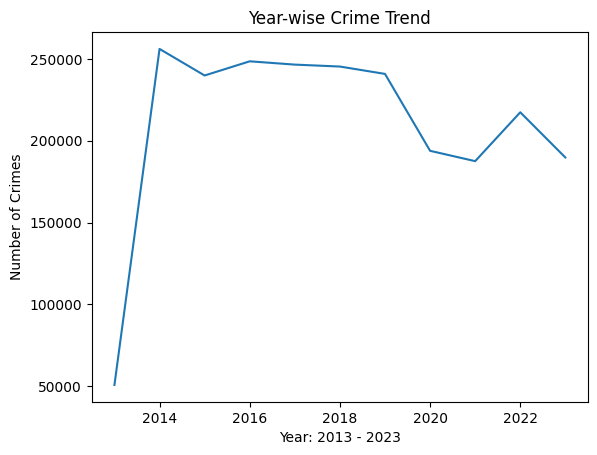

In [31]:
fig, ax = plt.subplots()
ax.plot(year_wise_pd['Year'], year_wise_pd['count'])
ax.set(xlabel = 'Year: 2013 - 2023', ylabel = 'Number of Crimes', title = "Year-wise Crime Trend")

From the above graph, we can infer the following - 
- The crime rates are mildly decreasing each year.
- The exception was in 2016 and 2022 when there was a surge in the number of crimes.
- The decline of crime rates in 2020 and 2021 could be credited to the COVID-19 pandemic [How COVID-19 Changed Crime in the U.S.](https://publicaffairs.northeastern.edu/articles/us-crime-rate-during-pandemic/). However, different crimes responded differently to the pandemic.


### 2) The Hour of Crimes!

In [43]:
'''
We can easily extract the hour portion from the timestamp in 'Date' column and save it as a different column
'''
Hour = final_data.withColumn('Hour', hour(final_data['Date']))
Hour.select('Hour').show()

+----+
|Hour|
+----+
|  10|
|   5|
|  10|
|  23|
|  20|
|  22|
|  22|
|   0|
|   0|
|   1|
|  12|
|  22|
|  22|
|   9|
|   1|
|  23|
|  22|
|  23|
|  22|
|   2|
+----+
only showing top 20 rows



In [46]:
Hour_count = Hour.groupBy(['Hour']).count()
hour_wise_counts = Hour_count.orderBy('Hour', ascending = True)
hour_wise_counts.show(truncate = False)

+----+------+
|Hour|count |
+----+------+
|0   |127059|
|1   |73169 |
|2   |63659 |
|3   |53266 |
|4   |42152 |
|5   |36385 |
|6   |41057 |
|7   |55406 |
|8   |77643 |
|9   |100136|
|10  |100009|
|11  |103704|
|12  |133974|
|13  |109569|
|14  |115305|
|15  |126498|
|16  |122951|
|17  |125453|
|18  |130589|
|19  |129211|
+----+------+
only showing top 20 rows



In [47]:
'''
A new pandas dataframe with the count of crimes in each hour is created
'''
hour_pd = hour_wise_counts.toPandas()
hour_pd.head(5)

,Hour,count
0,0,127059
1,1,73169
2,2,63659
3,3,53266
4,4,42152


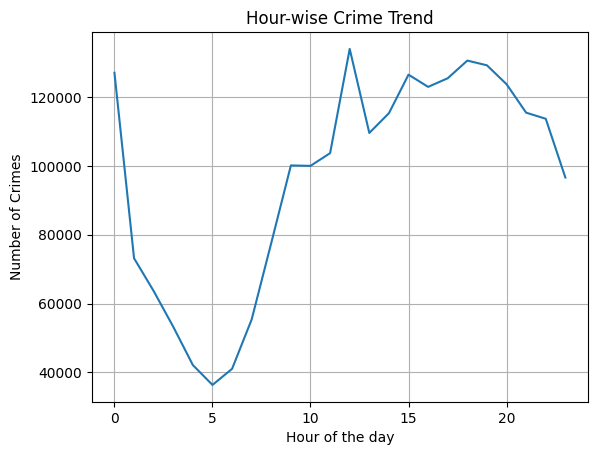

In [60]:
fig, ax = plt.subplots()
ax.plot(hour_pd['Hour'], hour_pd['count'])
ax.set(xlabel = 'Hour of the day', ylabel = 'Number of Crimes', title = "Hour-wise Crime Trend")
ax.grid()

From the above graph, we can infer - 
- The Hour of Crimes title is shared by 00 and 12 hours. And to surprise, 12 in the midday has more crimes!
- The crimes are the least in the early hours of the day and dawn.
- The number of crimes from 09 to 23 hours tends to be high throughout.

### 3) Top Ten Crimes

In [51]:
'''
In this part of the analysis, the top ten categories of extracted along with their counts.
The new_data pyspark data frame is used instead of teh final_data as the 'primary_type' in 'final_data' is regrouped.
'''
crime_types = new_data.groupBy('Primary Type').count()
crime_types_count = crime_types.orderBy('count', ascending = False)
crime_types_count.show(10)

+-------------------+------+
|       Primary Type| count|
+-------------------+------+
|              THEFT|557760|
|            BATTERY|462883|
|    CRIMINAL DAMAGE|275898|
|            ASSAULT|192592|
| DECEPTIVE PRACTICE|157010|
|MOTOR VEHICLE THEFT|128518|
|          NARCOTICS|128111|
|           BURGLARY|108194|
|            ROBBERY| 96317|
|  WEAPONS VIOLATION| 59936|
+-------------------+------+
only showing top 10 rows



In [54]:
'''
The pandas data frame is created for the top ten crimes
'''
top_crimes_pd = crime_types_count.limit(10).toPandas()
top_crimes_pd

,Primary Type,count
0,THEFT,557760
1,BATTERY,462883
2,CRIMINAL DAMAGE,275898
3,ASSAULT,192592
4,DECEPTIVE PRACTICE,157010
5,MOTOR VEHICLE THEFT,128518
6,NARCOTICS,128111
7,BURGLARY,108194
8,ROBBERY,96317
9,WEAPONS VIOLATION,59936


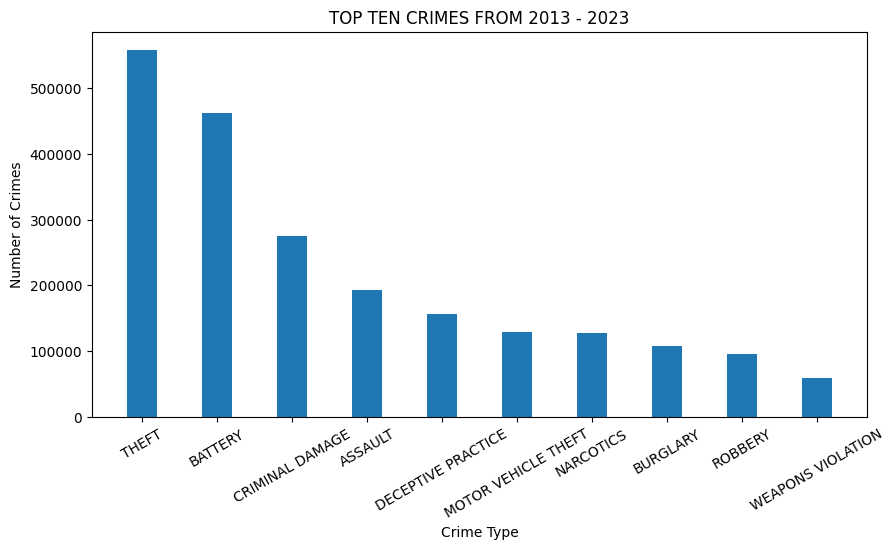

In [59]:
fig = plt.figure(figsize = (10,5))
plt.bar(top_crimes_pd['Primary Type'], top_crimes_pd['count'], width = 0.4)
plt.xticks(rotation = 30)
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.title("TOP TEN CRIMES FROM 2013 - 2023")
plt.show()

From the above graph we can infer - 
- The most reported crime is Theft followed by Battery-related.
- The data is not categorized into primary types, so the number of crimes under theft/robbery are more as visualized in the below figure.

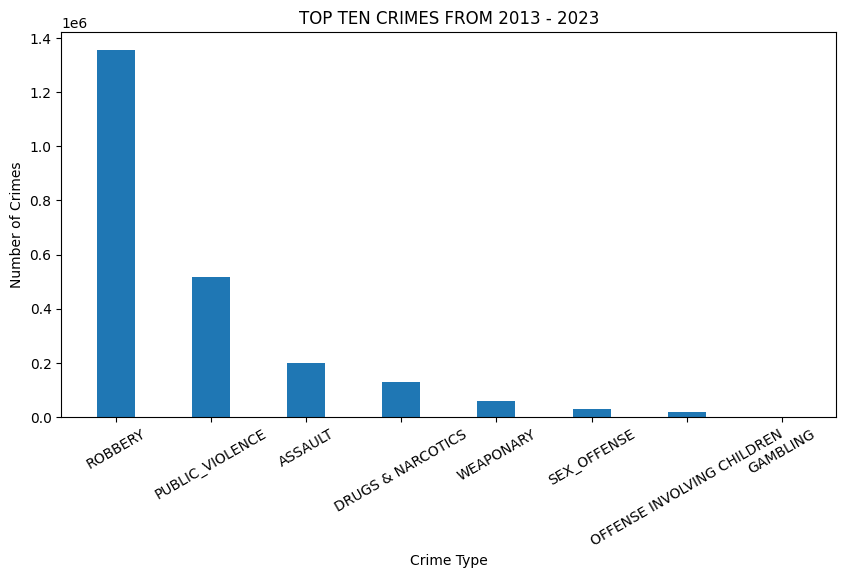

In [61]:
crime_types_ = final_data.groupBy('Primary Type').count()
crime_types_count_ = crime_types_.orderBy('count', ascending = False)
top_crimes_pd_ = crime_types_count_.toPandas()
fig = plt.figure(figsize = (10,5))
plt.bar(top_crimes_pd_['Primary Type'], top_crimes_pd_['count'], width = 0.4)
plt.xticks(rotation = 30)
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.title("TOP TEN CRIMES FROM 2013 - 2023")
plt.show()

Clearly, robbery is most reported case without any close seconds.

Public Violence has less than half the number of cases as that of robbery.